In [2]:
#https://github.com/lazyprogrammer/machine_learning_examples/blob/master/linear_regression_class
%matplotlib inline

import re
import numpy as np
import matplotlib.pyplot as plt
# from sklearn.model_selection import cross_validate, train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [11]:
X = []
Y = []

non_decimal = re.compile(r'[^\d]+')

In [12]:
for line in open('/Users/sayanbi/Desktop/ML/moore.csv'):
    r = line.split('\t')
    x = int(non_decimal.sub('', r[2].split('[')[0]))
    y = int(non_decimal.sub('', r[1].split('[')[0]))
    X.append(x)
    Y.append(y)

In [13]:
print(X)

[1971, 1972, 1974, 1974, 1974, 1974, 1975, 1976, 1976, 1978, 1978, 1979, 1979, 1981, 1982, 1982, 1983, 1984, 1985, 1985, 1985, 1986, 1987, 1988, 1988, 1989, 1989, 1991, 1991, 1993, 1994, 1995, 1995, 1996, 1997, 1997, 1998, 1999, 1999, 1999, 1999, 1999, 2000, 2000, 2001, 2002, 2002, 2003, 2003, 2003, 2004, 2004, 2005, 2005, 2006, 2006, 2006, 2006, 2006, 2007, 2007, 2007, 2007, 2007, 2008, 2008, 2008, 2008, 2008, 2009, 2010, 2010, 2010, 2010, 2010, 2010, 2011, 2011, 2011, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2013, 2013, 2013, 2013, 2014, 2014, 2014, 2014, 2014, 2014, 2015, 2015, 2015, 2015, 2015, 2016]


In [14]:
print(Y)

[2300, 3500, 4500, 4100, 5000, 8000, 3510, 6500, 8500, 29000, 9000, 29000, 68000, 11500, 55000, 134000, 22000, 190000, 25000, 275000, 16000, 30000, 553000, 180000, 250000, 300000, 1180235, 35000, 1350000, 3100000, 578977, 5500000, 2500000, 4300000, 8800000, 7500000, 7500000, 21300000, 22000000, 111000, 27400000, 9500000, 42000000, 21000000, 45000000, 220000000, 55000000, 105900000, 54300000, 410000000, 592000000, 112000000, 169000000, 228000000, 241000000, 291000000, 1700000000, 184000000, 362000000, 463000000, 26000000, 169000000, 411000000, 789000000, 758000000, 47000000, 230000000, 731000000, 1900000000, 904000000, 1000000000, 1200000000, 2300000000, 2000000000, 1400000000, 1170000000, 2600000000, 1160000000, 2270000000, 5000000000, 1200000000, 3100000000, 2100000000, 1303000000, 1400000000, 2750000000, 4200000000, 1000000000, 1860000000, 5000000000, 4310000000, 5560000000, 2600000000, 2000000000, 3000000000, 1400000000, 1900000000, 3990000000, 7100000000, 1750000000, 10000000000, 7

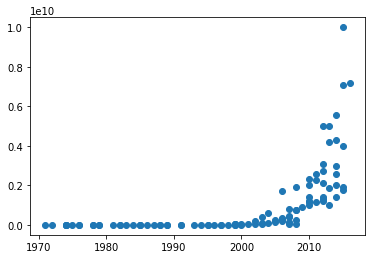

In [15]:
X = np.array(X)
Y = np.array(Y)

plt.scatter(X, Y)
plt.show()

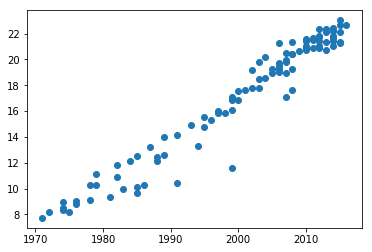

In [16]:
Y = np.log(Y)
plt.scatter(X, Y)
plt.show()

In [17]:
# Split the data into training/testing sets
X_train = X[:-20]
X_test = X[-20:]

# Split the targets into training/testing sets
y_train = Y[:-20]
y_test = Y[-20:]

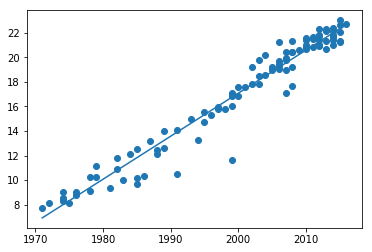

a: 0.3510435733650199 b: -685.000284381709
the r-squared is: 0.952944285228576
time to double: 1.9745331723797188 years


In [18]:
# copied from lr_1d.py
denominator = X.dot(X) - X.mean() * X.sum()
a = ( X.dot(Y) - Y.mean()*X.sum() ) / denominator
b = ( Y.mean() * X.dot(X) - X.mean() * X.dot(Y) ) / denominator

# let's calculate the predicted Y
Yhat = a*X + b

plt.scatter(X, Y)
plt.plot(X, Yhat)
plt.show()

# determine how good the model is by computing the r-squared
d1 = Y - Yhat
d2 = Y - Y.mean()
r2 = 1 - d1.dot(d1) / d2.dot(d2)
print("a:", a, "b:", b)
print("the r-squared is:", r2)

# how long does it take to double?
# log(transistorcount) = a*year + b
# transistorcount = exp(b) * exp(a*year)
# 2*transistorcount = 2 * exp(b) * exp(a*year) = exp(ln(2)) * exp(b) * exp(a * year) = exp(b) * exp(a * year + ln(2))
# a*year2 = a*year1 + ln2
# year2 = year1 + ln2/a
print("time to double:", np.log(2)/a, "years")

Coefficients: 
 [0.35497092]
Mean squared error: 0.36
Variance score: 0.11


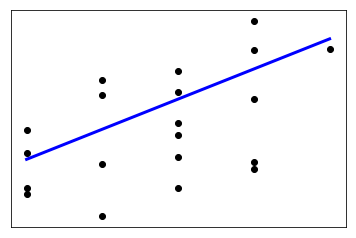

In [20]:
# Create linear regression object
regr = linear_model.LinearRegression(fit_intercept=True)

X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_pred))

# Plot outputs
# plt.scatter(X, Y,  color='black')
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

# Multiple Linear Regression


*** No CODEPAGE record, no encoding_override: will use 'ascii'


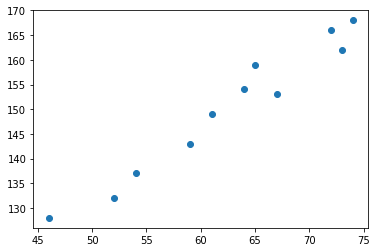

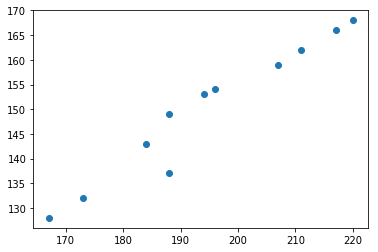

r2 for x2 only: 0.9578407208147355
r2 for x3 only: 0.9419952085293065
r2 for both: 0.9768471041502091


In [3]:
# https://deeplearningcourses.com/c/data-science-linear-regression-in-python
# need to sudo pip install xlrd to use pd.read_excel
# data is from:
# http://college.cengage.com/mathematics/brase/understandable_statistics/7e/students/datasets/mlr/frames/mlr02.html

# The data (X1, X2, X3) are for each patient.
# X1 = systolic blood pressure
# X2 = age in years
# X3 = weight in pounds

from __future__ import print_function, division
from builtins import range
# Note: you may need to update your version of future
# sudo pip install -U future



import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

df = pd.read_excel('/Users/sayanbi/Desktop/mlr02.xls')
X = df.values

# using age to predict systolic blood pressure
plt.scatter(X[:,1], X[:,0])
plt.show()
# looks pretty linear!

# using weight to predict systolic blood pressure
plt.scatter(X[:,2], X[:,0])
plt.show()
# looks pretty linear!

df['ones'] = 1
Y = df['X1']
X = df[['X2', 'X3', 'ones']]
X2only = df[['X2', 'ones']]
X3only = df[['X3', 'ones']]

def get_r2(X, Y):
    w = np.linalg.solve( X.T.dot(X), X.T.dot(Y) )
    Yhat = X.dot(w)

    # determine how good the model is by computing the r-squared
    d1 = Y - Yhat
    d2 = Y - Y.mean()
    r2 = 1 - d1.dot(d1) / d2.dot(d2)
    return r2

print("r2 for x2 only:", get_r2(X2only, Y))
print("r2 for x3 only:", get_r2(X3only, Y))
print("r2 for both:", get_r2(X, Y))
